code is from here: https://heartbeat.fritz.ai/build-train-and-deploy-a-book-recommender-system-using-keras-tensorflow-js-b96944b936a7

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
ratings = pd.read_pickle("./Data/top100_pivot.pkl")
# ratings = pd.read_pickle("./Data/moderate_users_longform.pkl")
user_stats = pd.read_pickle("./Data/moderate_user_stats.pkl")

In [55]:
ratings.head()

movie_id,10,12,13,14,15,18,21,24,25,26,...,251150,251802,252054,252460,254118,255150,255533,255726,256042,260892
user_id,,,,,,,,,,,,,,,,,,,,,
1476795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4736049,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4936026,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5355586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6588695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


In [56]:
user_stats.head()

,mean_score,median_score,n_ratings
user_id,,,
176,3.538462,3.0,13
2385,4.437500,5.0,16
3047,4.750000,5.0,8
5369,3.875000,4.0,8
7952,4.516129,5.0,31


In [57]:
ratings = ratings.sub(user_stats.loc[ratings.index]['mean_score'], axis=0).fillna(0)

In [58]:
ratings.head()

movie_id,10,12,13,14,15,18,21,24,25,26,...,251150,251802,252054,252460,254118,255150,255533,255726,256042,260892
user_id,,,,,,,,,,,,,,,,,,,,,
1476795,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4736049,0.0,0.961224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4936026,0.0,1.589796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5355586,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6588695,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116564,0.0


In [59]:
np.min(ratings.values), np.max(ratings.values)

(-3.41358024691358, 2.377319587628866)

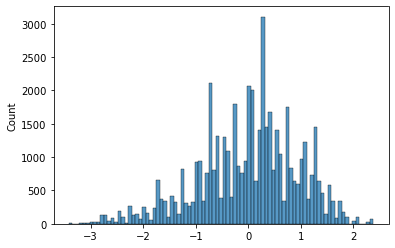

In [60]:
sns.histplot(x=[v for v in ratings.values.flatten() if v!=0])
plt.show()

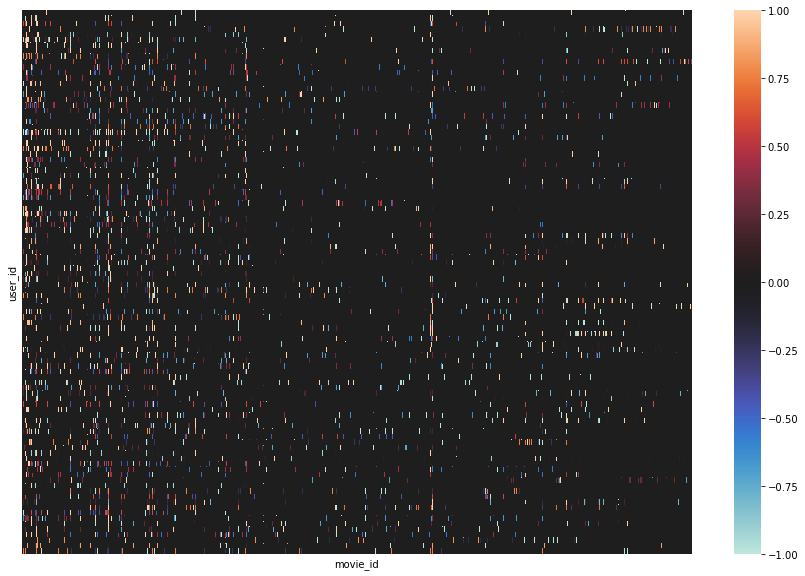

In [61]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=ratings, 
#             robust=True, 
            vmin=-1, vmax=1,
            center=0, 
            xticklabels=[], yticklabels=[])

plt.show()

In [48]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [62]:
X = ratings.values

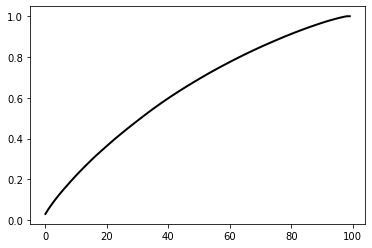

In [63]:
pca = PCA()
pca.fit(X)

fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_),'-', linewidth=2, color='k')
plt.show()

In [67]:
sos = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    sos.append(km.inertia_)

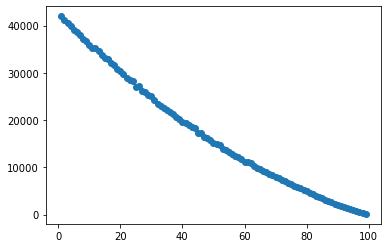

In [68]:
fig, ax = plt.subplots()
ax.plot(K, sos, 'o-')
plt.show()

In [4]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()
n_users

37235

In [5]:
item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()
n_movies

29758

In [13]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.5, random_state=42)

In [14]:
X_train.shape, X_test.shape

((277577, 3), (277577, 3))

In [15]:
nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

In [16]:
del model

NameError: name 'model' is not defined

In [17]:
input_movies = keras.layers.Input(shape=[1])
embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
movies_out = keras.layers.Flatten()(embed_movies)

input_users = keras.layers.Input(shape=[1])
embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
users_out = keras.layers.Flatten()(embed_users)

conc_layer = keras.layers.Concatenate()([movies_out, users_out])
x = keras.layers.Dense(32, activation='relu')(conc_layer)
dropout = x = keras.layers.Dropout(rate=.3, seed=42)(x)
# dense2 = x = keras.layers.Dense(32, activation='relu')(x)
dense3 = x = keras.layers.Dense(16, activation='relu')(x)
x_out = x = keras.layers.Dense(1, activation='relu')(x)


model = keras.Model([input_movies, input_users], x_out)

In [18]:
opt = tf.optimizers.Adam(learning_rate=.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 15)        446385      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 15)        558540      input_2[0][0]                    
______________________________________________________________________________________________

In [32]:
ratings.groupby('rating_score').count()['movie_id'].apply(lambda x: 1/x).reset_index(drop=True)

0    0.000059
1    0.000023
2    0.000008
3    0.000005
4    0.000006
Name: movie_id, dtype: float64

In [33]:
class_weights = dict(ratings.groupby('rating_score').count()['movie_id'].apply(lambda x: 1/x).reset_index(drop=True))

In [35]:
class_weights

{0: 5.8578876457149553e-05,
 1: 2.3148148148148147e-05,
 2: 7.6165522914397565e-06,
 3: 4.803743076605291e-06,
 4: 6.434219754341489e-06}

In [37]:
hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score, 
                 class_weight=class_weights,
                 batch_size=64, epochs=20, verbose=1, validation_split=.2)

Epoch 1/20


InvalidArgumentError:  indices[0] = 5 is not in [0, 5)
	 [[{{node GatherV2}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1071]

Function call stack:
train_function


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

In [ ]:
train_loss = hist.history['root_mean_squared_error']
val_loss = hist.history['val_root_mean_squared_error']
plt.plot(train_loss, color='r', label='Train RMSE')
plt.plot(val_loss, color='b', label='Validation RMSE')
plt.title("Train and Validation RMSE Curve")
plt.legend()
plt.show()

In [ ]:
ratings.groupby('user_id').count().sort_values(by='movie_id',ascending=False)

In [ ]:
ratings[ratings.user_id==74769593]

In [ ]:
movie_array = ratings[ratings.user_id==74769593].movie.values.astype(int)
user = np.array([int(27853) for n in range(len(movie_array))])

In [ ]:
movie_array.shape, movie_array.dtype, user.shape, user.dtype

In [ ]:
pred = model.predict([movie_array, user])

In [ ]:
pred.flatten()

In [ ]:
list(zip(zip(pred.flatten(), ratings[ratings.user_id==74769593].centered_rating.values),movie_array))